# Assignment 1: Naive Bayes classification {-}

This assignment aims at familiarizing you with training and testing Naive Bayes model. You will have to:

- Load the data.
- Split train/test sets.
- Train a Gaussian Naive Bayes model using the training set in two scenarios: with and without StandardScaler.
- Evaluate the model performance on the test set using the following metrics: precision, recall, f1-score, in with and without using StandardScaler scenarios to see the impact of standardization on Gaussian Naive Bayes.

The dataset you will be working on is 'travel-insurance.csv'. It is composed of attributes such as age, employment type, etc, to predict if a customer is going to buy a travel insurance.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment1-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment1 (e.g., ML4DS-2012345-Assigment1) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you handle the data for training and testing purpose, build a Naive Bayes classifier and evaluate the model performance. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("travel-insurance.csv")
df.head(10)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
6,6,31,Government Sector,Yes,1300000,4,0,No,No,0
7,7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1
8,8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1
9,9,33,Government Sector,Yes,800000,3,0,Yes,No,0


Here follows the list of columns in the dataset:

* Age - Age of the customer
* Employment Type - The sector in which customer is employed
* GraduateOrNot - Whether the customer is college graduate or not
* AnnualIncome - The yearly income of the customer in indian rupees
* FamilyMembers - Number of members in customer's family
* ChronicDisease - Whether the customer suffers from any major disease or conditions like diabetes/high BP or asthama, etc.
* FrequentFlyer - Derived data based on customer's history of booking air tickets on atleast 4 different instances in the last 2 Years (2017-2019).
* EverTravelledAbroad - Has the customer ever travelled to a foreign country.
* TravelInsurance: (label) Did the customer buy travel insurance package during introductory offering held in the year 2019.

## EDA

In [3]:
# Get some basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [4]:
df['Employment Type'].value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

In [5]:
# Select categorical variables columns
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

# Encode categorical variables
df = pd.get_dummies(df, columns=cat_cols)

# Show the dataframe
df

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,0,31,400000,6,1,0,1,0,0,1,1,0,1,0
1,1,31,1250000,7,0,0,0,1,0,1,1,0,1,0
2,2,34,500000,4,1,1,0,1,0,1,1,0,1,0
3,3,28,700000,3,1,0,0,1,0,1,1,0,1,0
4,4,28,700000,8,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,1500000,4,0,1,0,1,0,1,0,1,0,1
1983,1983,28,1750000,5,1,0,0,1,0,1,1,0,0,1
1984,1984,28,1150000,6,1,0,0,1,0,1,1,0,1,0
1985,1985,34,1000000,6,0,1,0,1,0,1,0,1,0,1


In [6]:
# Show dataset shape
df.shape

(1987, 14)

In [7]:
# Show some statistics of each variable in dataset
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323,0.286865,0.713135,0.148465,0.851535,0.790136,0.209864,0.808757,0.191243
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332,0.452412,0.452412,0.355650,0.355650,0.407314,0.407314,0.393379,0.393379
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#check whether there are missing values
df.isnull().sum()

Unnamed: 0                                      0
Age                                             0
AnnualIncome                                    0
FamilyMembers                                   0
ChronicDiseases                                 0
TravelInsurance                                 0
Employment Type_Government Sector               0
Employment Type_Private Sector/Self Employed    0
GraduateOrNot_No                                0
GraduateOrNot_Yes                               0
FrequentFlyer_No                                0
FrequentFlyer_Yes                               0
EverTravelledAbroad_No                          0
EverTravelledAbroad_Yes                         0
dtype: int64

In [9]:
# Drop "Unnamed: 0" column as it does not contain useful information for building the model
df = df.drop(['Unnamed: 0'], axis = 1)

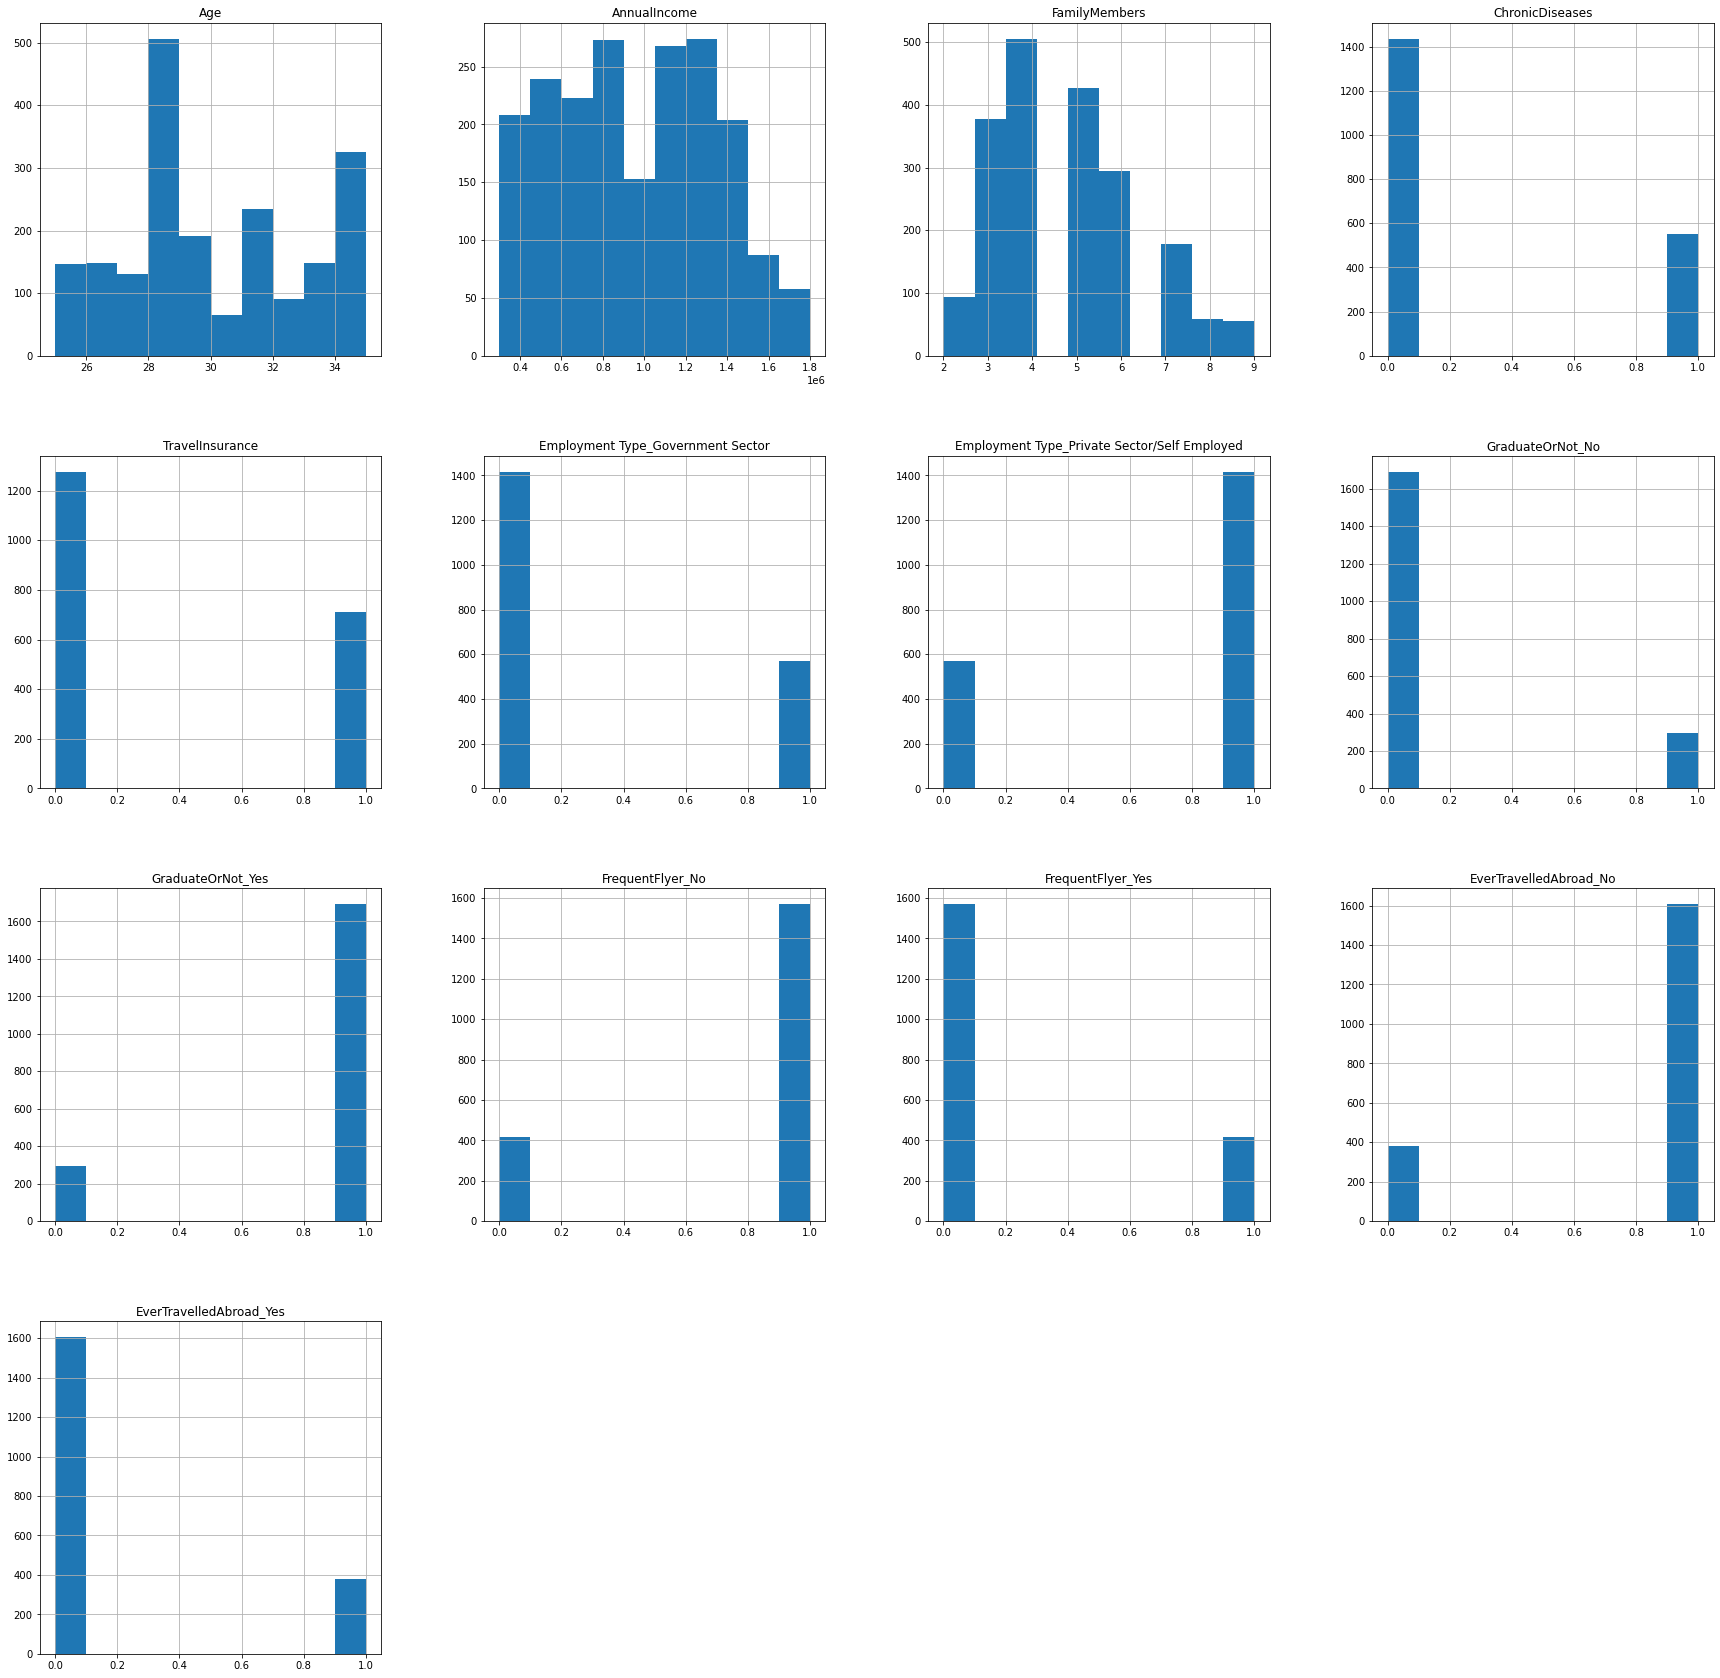

In [10]:
# Drawing histograms to check the variable's distribution
df.hist(figsize=(30,30))
plt.show()

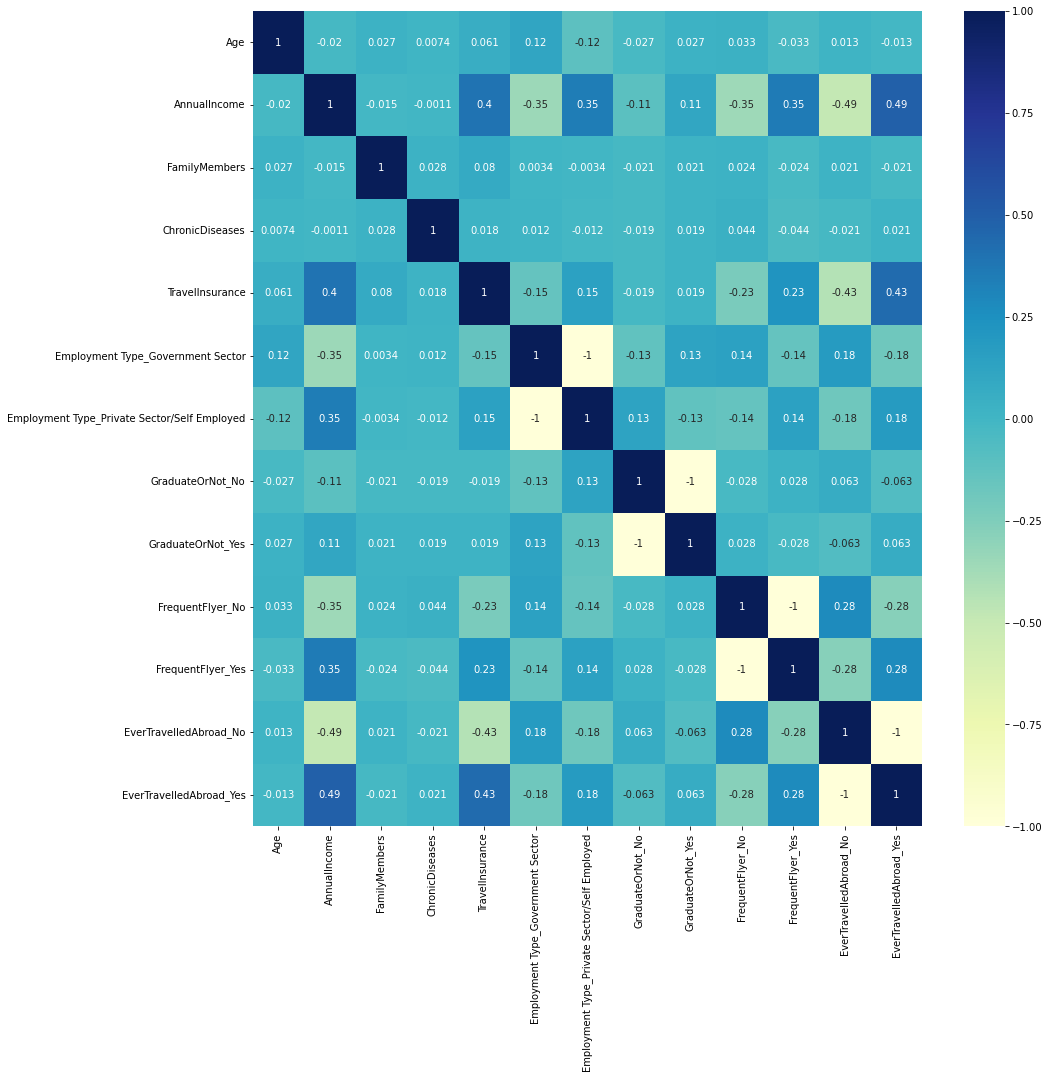

In [11]:
# Drawing the heatmap to check the correlations between variables
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [12]:
# Remove the label column "TravelInsurance" from the data features
X = df.drop(['TravelInsurance'], axis = 1)
X

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,1,1,0,0,1,1,0,1,0
1,31,1250000,7,0,0,1,0,1,1,0,1,0
2,34,500000,4,1,0,1,0,1,1,0,1,0
3,28,700000,3,1,0,1,0,1,1,0,1,0
4,28,700000,8,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,0,1,0,1,0,1,0,1
1983,28,1750000,5,1,0,1,0,1,1,0,0,1
1984,28,1150000,6,1,0,1,0,1,1,0,1,0
1985,34,1000000,6,0,0,1,0,1,0,1,0,1


In [13]:
# Assign data label values to variable y
y = df['TravelInsurance'].values
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [14]:
# Show data feature shape
X.shape

(1987, 12)

In [15]:
# Show data label shape
y.shape

(1987,)

In [16]:
# Split the data into train/test set using sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
# Initialize Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

# Define the values of hyperparameter var_smoothing we want to try
grid_search={"var_smoothing":[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 2e-2, 2e-3, 2e-4, 2e-5, 2e-6, 2e-7, 2e-8, 2e-9, 2e-10, 2e-11, 2e-12, 2e-13, 2e-14, 2e-15]} # Define the values of hyperparameter C we want to try

# Set up GridSearchCV to find the best value of hyperparameter var_smoothing, with 10-fold cross validation
from sklearn.model_selection import GridSearchCV
naive_cv=GridSearchCV(naive_model, grid_search, cv=10)

## Gaussian with StandardScaler

In [18]:
# Standardize the data using Standard scaler
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_normal_train = normalizer.fit_transform(X_train)     
X_normal_test = normalizer.transform(X_test)        

In [19]:
# Train the model
naive_normal_plot = naive_cv.fit(X_normal_train, y_train) 

In [20]:
# Show the results of each hyperparameter var_smoothing with 10-fold cross validation
result_normal = pd.DataFrame(naive_normal_plot.cv_results_)
result_normal = result_normal.set_index('params')
result_normal

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
params,,,,,,,,,,,,,,,,,,
{'var_smoothing': 0.01},0.004001,0.002000,0.000980,0.000754,0.01,0.741007,0.705036,0.697842,0.726619,0.697842,0.719424,0.776978,0.676259,0.76259,0.697842,0.720144,0.030259,2
{'var_smoothing': 0.001},0.002721,0.002362,0.001219,0.001537,0.001,0.741007,0.705036,0.705036,0.719424,0.697842,0.719424,0.776978,0.676259,0.76259,0.697842,0.720144,0.029741,2
{'var_smoothing': 0.0001},0.004102,0.003060,0.001597,0.001200,0.0001,0.741007,0.705036,0.705036,0.719424,0.697842,0.719424,0.776978,0.676259,0.76259,0.697842,0.720144,0.029741,2
{'var_smoothing': 1e-05},0.003452,0.004046,0.001068,0.002118,0.00001,0.741007,0.705036,0.705036,0.719424,0.697842,0.719424,0.776978,0.676259,0.76259,0.697842,0.720144,0.029741,2
{'var_smoothing': 1e-06},0.003945,0.003548,0.001167,0.002862,0.000001,0.741007,0.705036,0.705036,0.719424,0.697842,0.719424,0.776978,0.676259,0.76259,0.697842,0.720144,0.029741,2
{'var_smoothing': 1e-07},0.003192,0.003777,0.001715,0.002712,0.0,0.741007,0.705036,0.705036,0.719424,0.697842,0.719424,0.776978,0.676259,0.76259,0.697842,0.720144,0.029741,2
{'var_smoothing': 1e-08},0.003745,0.003995,0.000932,0.001889,0.0,0.741007,0.705036,0.705036,0.719424,0.697842,0.719424,0.776978,0.676259,0.76259,0.697842,0.720144,0.029741,2
{'var_smoothing': 1e-09},0.003238,0.002006,0.000506,0.000937,0.0,0.741007,0.705036,0.705036,0.719424,0.697842,0.719424,0.776978,0.676259,0.76259,0.697842,0.720144,0.029741,2
{'var_smoothing': 1e-10},0.002168,0.001828,0.001537,0.001317,0.0,0.741007,0.705036,0.705036,0.719424,0.697842,0.719424,0.776978,0.676259,0.76259,0.697842,0.720144,0.029741,2


In [21]:
# Ranking the score of each hyperparameter var_smoothing to choose the best one
result_normal[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score
params,,
{'var_smoothing': 0.002},0.720863,1
{'var_smoothing': 0.01},0.720144,2
{'var_smoothing': 2e-13},0.720144,2
{'var_smoothing': 2e-12},0.720144,2
{'var_smoothing': 2e-11},0.720144,2
{'var_smoothing': 2e-10},0.720144,2
{'var_smoothing': 2e-09},0.720144,2
{'var_smoothing': 2e-08},0.720144,2
{'var_smoothing': 2e-07},0.720144,2


In [22]:
# Show the best value of var_smoothing
naive_normal_plot.best_params_

{'var_smoothing': 0.002}

In [23]:
# Show the model performance with the best value of var_smoothing
naive_normal_plot.best_score_

0.720863309352518

In [24]:
# Initialize Logistic Regression model with the best value of hyper parameter var_smoothing
naive_normal = GaussianNB(var_smoothing=naive_normal_plot.best_params_['var_smoothing']) 

# Train the model
naive_normal.fit(X_normal_train, y_train)  

# Test accuracy of the 'best' hyperparameter var_smoothing = 0.002
naive_normal.score(X_normal_test, y_test)             

0.7520938023450586

In [25]:
# Impport libraries to calculate evaluation metrics: precision, recall, f1 score.
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Make prediction on the test data
predicted_normal_label = naive_normal.predict(X_normal_test)

# Calculate evaluation metrics by comparing the prediction with the data label y_test
print(precision_score(predicted_normal_label, y_test))
print(recall_score(predicted_normal_label, y_test))
print(f1_score(predicted_normal_label, y_test))
print(classification_report(predicted_normal_label, y_test))

0.5514018691588785
0.6941176470588235
0.6145833333333333
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       427
           1       0.55      0.69      0.61       170

    accuracy                           0.75       597
   macro avg       0.71      0.73      0.72       597
weighted avg       0.78      0.75      0.76       597



## Gaussian without StandardScaler 

In [26]:
# Train the model
naive_plot = naive_cv.fit(X_train, y_train) 

In [27]:
# Show the results of each hyperparameter var_smoothing with 10-fold cross validation
result = pd.DataFrame(naive_plot.cv_results_)
result = result.set_index('params')
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
params,,,,,,,,,,,,,,,,,,
{'var_smoothing': 0.01},0.009035,0.001876,0.005437,0.002892,0.01,0.769784,0.719424,0.769784,0.769784,0.741007,0.748201,0.784173,0.697842,0.719424,0.733813,0.745324,0.026570,7
{'var_smoothing': 0.001},0.008594,0.003647,0.003603,0.003880,0.001,0.769784,0.719424,0.769784,0.769784,0.741007,0.748201,0.784173,0.697842,0.719424,0.733813,0.745324,0.026570,7
{'var_smoothing': 0.0001},0.007135,0.002559,0.005744,0.003930,0.0001,0.769784,0.719424,0.769784,0.769784,0.741007,0.748201,0.784173,0.697842,0.719424,0.733813,0.745324,0.026570,7
{'var_smoothing': 1e-05},0.003783,0.002559,0.004912,0.002487,0.00001,0.769784,0.719424,0.769784,0.769784,0.741007,0.748201,0.784173,0.697842,0.719424,0.733813,0.745324,0.026570,7
{'var_smoothing': 1e-06},0.006063,0.002986,0.004767,0.003859,0.000001,0.769784,0.719424,0.769784,0.769784,0.741007,0.748201,0.784173,0.697842,0.719424,0.733813,0.745324,0.026570,7
{'var_smoothing': 1e-07},0.006637,0.003654,0.003669,0.004048,0.0,0.769784,0.719424,0.769784,0.769784,0.741007,0.748201,0.784173,0.697842,0.719424,0.733813,0.745324,0.026570,7
{'var_smoothing': 1e-08},0.007143,0.004000,0.004145,0.002652,0.0,0.769784,0.719424,0.769784,0.769784,0.741007,0.748201,0.784173,0.697842,0.719424,0.733813,0.745324,0.026570,7
{'var_smoothing': 1e-09},0.004736,0.003692,0.003702,0.003578,0.0,0.769784,0.719424,0.769784,0.769784,0.741007,0.748201,0.784173,0.697842,0.719424,0.733813,0.745324,0.026570,7
{'var_smoothing': 1e-10},0.004525,0.002949,0.003660,0.002703,0.0,0.798561,0.741007,0.791367,0.791367,0.741007,0.776978,0.820144,0.697842,0.719424,0.755396,0.763309,0.036747,3


In [28]:
# Ranking the score of each hyperparameter var_smoothing to choose the best one
result[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score
params,,
{'var_smoothing': 1e-11},0.776259,1
{'var_smoothing': 2e-11},0.773381,2
{'var_smoothing': 1e-10},0.763309,3
{'var_smoothing': 2e-12},0.760432,4
{'var_smoothing': 2e-10},0.757554,5
{'var_smoothing': 1e-12},0.747482,6
{'var_smoothing': 2e-09},0.745324,7
{'var_smoothing': 2e-08},0.745324,7
{'var_smoothing': 2e-07},0.745324,7


In [29]:
# Show the best value of var_smoothing
naive_plot.best_params_

{'var_smoothing': 1e-11}

In [30]:
# Show the model performance with the best value of var_smoothing
naive_plot.best_score_

0.7762589928057554

In [31]:
# Show the model performance with the best value of var_smoothing
naive = GaussianNB(var_smoothing=naive_plot.best_params_['var_smoothing']) 

# Train the model
naive.fit(X_train, y_train)   

# Test accuracy of the 'best' hyperparameter 
naive.score(X_test, y_test)             

0.7922948073701842

In [32]:
# Impport libraries to calculate evaluation metrics: precision, recall, f1 score.
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Make prediction on the test data
predicted_label = naive.predict(X_test)

# Calculate evaluation metrics by comparing the prediction with the data label y_test
print(precision_score(predicted_label, y_test))
print(recall_score(predicted_label, y_test))
print(f1_score(predicted_label, y_test))
print(classification_report(predicted_label, y_test))

0.514018691588785
0.8461538461538461
0.6395348837209301
              precision    recall  f1-score   support

           0       0.95      0.78      0.85       467
           1       0.51      0.85      0.64       130

    accuracy                           0.79       597
   macro avg       0.73      0.81      0.75       597
weighted avg       0.85      0.79      0.81       597



## Mixed Naive-Bayes

In [33]:
from mixed_naive_bayes import MixedNB

# Specify the indices of the features which are to follow the categorical distribution (columns 3 to 11).
clf = MixedNB(categorical_features=[3,4,5,6,7,8,9,10,11])

# Train the model using the training set
clf.fit(X_train,y_train)

# Make sample predictions on test set
predicted_label = clf.predict(X_test)

In [34]:
# Calculate evaluation metrics by comparing the prediction with the data label y_test
print(precision_score(predicted_label, y_test))
print(recall_score(predicted_label, y_test))
print(f1_score(predicted_label, y_test))
print(classification_report(predicted_label, y_test))

0.5467289719626168
0.7358490566037735
0.6273458445040214
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       438
           1       0.55      0.74      0.63       159

    accuracy                           0.77       597
   macro avg       0.72      0.76      0.73       597
weighted avg       0.80      0.77      0.78       597



#### In conclusion, Gaussian-Naive-Bayes with standard scaler performes best with precision_score but worst with recall_score and f1_score. Reversely, Gaussian-Naive-Bayes without standard scaler has the highest recall_score and f1_score but lowest precision_score. While, the Mixed Naive-Bayes is quite neutral between 2 above methods.